In [3]:
import csv
from pathlib import Path
import pandas as pd
import graphviz
import numpy as np
from sklearn import tree
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.preprocessing import Imputer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from IPython.display import display, HTML
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import itertools

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
#set random seed for reproducible results
np.random.seed(1234)

np.set_printoptions(threshold=np.nan)

#Data reaading parameter
TEST_PATH ='dataset/aps_failure_test_set.csv'
TRAIN_PATH ='dataset/aps_failure_training_set.csv'
COLUMNS = ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000', 'cl_000', 'cm_000', 'cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009', 'co_000', 'cp_000', 'cq_000', 'cr_000', 'cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009', 'ct_000', 'cu_000', 'cv_000', 'cx_000', 'cy_000', 'cz_000', 'da_000', 'db_000', 'dc_000', 'dd_000', 'de_000', 'df_000', 'dg_000', 'dh_000', 'di_000', 'dj_000', 'dk_000', 'dl_000', 'dm_000', 'dn_000', 'do_000', 'dp_000', 'dq_000', 'dr_000', 'ds_000', 'dt_000', 'du_000', 'dv_000', 'dx_000', 'dy_000', 'dz_000', 'ea_000', 'eb_000', 'ec_00', 'ed_000', 'ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009', 'ef_000', 'eg_000']

HISTOGRAMMERGEDCOLUMNS = ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
                           'ah_000', 'ai_000',
                          'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000',
                          'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000',
                             'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 
                          'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 
                          'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 
                          'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 
                          'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 
                          'cj_000', 'ck_000', 'cl_000', 'cm_000', 
                          'co_000', 'cp_000', 'cq_000', 'cr_000',  
                          'ct_000', 'cu_000', 'cv_000', 'cx_000', 'cy_000', 'cz_000', 'da_000', 
                          'db_000', 'dc_000', 'dd_000', 'de_000', 'df_000', 'dg_000', 'dh_000', 
                          'di_000', 'dj_000', 'dk_000', 'dl_000', 'dm_000', 'dn_000', 'do_000', 
                          'dp_000', 'dq_000', 'dr_000', 'ds_000', 'dt_000', 'du_000', 'dv_000', 
                          'dx_000', 'dy_000', 'dz_000', 'ea_000', 'eb_000', 'ec_00', 'ed_000', 
                          'ef_000', 'eg_000','ag_median','ay_median', 'az_median', 'ba_median','cn_median','cs_median','ee_median']


CLASS_LABELS = ['neg', 'pos']
SKIPROWS = 20

#Histogram columns
AG = np.array(['ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009'])
AY = np.array(['ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009'])
AZ = np.array(['az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009'])
BA = np.array(['ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009'])
CN = np.array(['cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009'])
CS = np.array(['cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009'])
EE = np.array(['ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009'])

#Data preprocessing parameter
NaNSTRATEGY = ['mean', 'median', 'most_frequent']


done


In [4]:
def loadDatasetWithPandas(path, skiprowsNum):
    # Reading the raw data from csv file
    rawData = pd.read_csv(path, skiprows=skiprowsNum)
    #display(rawData)
    # replacing the string indicating missing values with the numpy value for missing values
    NaNProcessedData = rawData.replace({'na': np.nan}, regex=True)
    return NaNProcessedData

#This Method deals with treating the Histogram Data.
def histogramProcessing(dataf):
    # is a dataframe...\n",
    #data_set = loadDatasetWithPandas(TRAIN_PATH, SKIPROWS)
    data_set=dataf
    ag_ = data_set[AG]
    ay_ = data_set[AY]
    az_ = data_set[AZ]
    ba_ = data_set[BA]
    cn_ = data_set[CN]
    cs_ = data_set[CS]
    ee_ = data_set[EE]
    
    # create new dataframe for each of the above with the mean\n",
    ag_mean = ag_.mean(axis=1, skipna=True)
    ay_mean = ay_.mean(axis=1, skipna=True)
    az_mean = az_.mean(axis=1, skipna=True)
    ba_mean = ba_.mean(axis=1, skipna=True)
    cn_mean = cn_.mean(axis=1, skipna=True)
    cs_mean = cs_.mean(axis=1, skipna=True)
    ee_mean = ee_.mean(axis=1, skipna=True)

    remaining_columns = np.setdiff1d(np.setdiff1d(np.setdiff1d(np.setdiff1d(np.setdiff1d(np.setdiff1d(np.setdiff1d(np.array(COLUMNS), AG), AY), AZ), BA), CN), CS), EE)
    remaining_columns= np.concatenate([['class'],remaining_columns])
    remaining_data = data_set[remaining_columns]
    return pd.concat(
        [
            remaining_data,
            ag_mean.rename('ag_median'),
            ay_mean.rename('ay_median'),
            az_mean.rename('az_median'),
            ba_mean.rename('ba_median'),
            cn_mean.rename('cn_median'),
            cs_mean.rename('cs_median'),
            ee_mean.rename('ee_median')
        ],
        axis=1
    )

def processNaNInDataset(data, strategy):
    values = data[list(COLUMNS)].values
    imp = Imputer(missing_values='NaN', strategy=strategy, axis=0)
    imp = imp.fit(values)
    cleanedValues = imp.transform(values)
    #label = data['class'].values
    return cleanedValues#, label

def removeClassFromDataFrame(trainData):
    df = pd.DataFrame(trainData, columns=COLUMNS)
    return df

def loadDataset(strategy):
    #Load Train Dataset
    trainData = loadDatasetWithPandas(TRAIN_PATH, SKIPROWS)
    #Load Test Dataset
    testData = loadDatasetWithPandas(TEST_PATH, SKIPROWS)
    #hist = trainData.hist(column=trainData.columns[], bins= 100)
    if(strategy == None):
        return trainData, testData

    #remove class column from datset to allow conversion to float datatype
    removeClassTrain = trainData.iloc[:,1:171]
    removeClassTest = testData.iloc[:,1:171]

    removeClassTrain = removeClassTrain.astype('float64')
    processedTrain = processNaNInDataset(removeClassTrain,strategy)

    removeClassTest = removeClassTest.astype('float64')
    processedTest = processNaNInDataset(removeClassTest,strategy)
   

    finalTrainFrame = pd.concat(
            [
                pd.DataFrame(trainData.iloc[:,0]),
                pd.DataFrame(processedTrain, columns=COLUMNS)
            ],
            axis=1
        )

    finalTestFrame = pd.concat(
            [
                pd.DataFrame(testData.iloc[:,0]),
                pd.DataFrame(processedTest, columns=COLUMNS)
            ],
            axis=1
        )
    return finalTrainFrame, finalTestFrame
print('done')

done


In [5]:
def evaluate(trueLabels, predictions):
    classificationRep = classification_report(trueLabels, predictions)
    print(classificationRep)
    
    confusionMatrix = confusion_matrix(trueLabels,predictions) 
    #print(confusionMatrix)
    #np.set_printoptions(precision=2)
    #Code for plotting Confusion matrix
    plt.figure()
    plot_confusion_matrix(confusionMatrix, classes=CLASS_LABELS,
                          title='Confusion matrix, without normalization')
    plt.figure()
    plot_confusion_matrix(confusionMatrix, classes=CLASS_LABELS, normalize=True,
                      title='Normalized confusion matrix')
    plt.show()
    #####################
    score = calculateOverallCostFromConfusionMatrix(confusionMatrix)
    print('Score: ' + str(score))
    return score
    

def calculateOverallCostFromConfusionMatrix(confusionMatrix):
    #cost function from description
    score = confusionMatrix[1][0] * 500 + 10*confusionMatrix[0][1]
    return score

#taken from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print('done')

done


In [ ]:
##################################
#Attention!!!! Real Shit starts here :P


#####load data & process histograms
#Data, NAN not processed (rows with empty values removed)
trainSet, testSet = loadDataset(None)
trainSet.dropna(inplace=True)
testSet.dropna(inplace=True)
trainSet  = pd.DataFrame(trainSet)
testSet  = pd.DataFrame(testSet)


#Normal data NAN Processed
meanTrainSet, meanTestSet = loadDataset(NaNSTRATEGY[0])
medianTrainSet, medianTestSet = loadDataset(NaNSTRATEGY[1])
mostFrequentTrainSet, mostFrequentTestSet = loadDataset(NaNSTRATEGY[2])

#Processed Histogram from normal data
meanTrainSetHist = histogramProcessing(meanTrainSet)
meanTestSetHist = histogramProcessing(meanTestSet)

medianTrainSetHist = histogramProcessing(medianTrainSet)
medianTestSetHist = histogramProcessing(medianTestSet)

mostFrequentTrainSetHist = histogramProcessing(mostFrequentTrainSet)
mostFrequentTestSetHist = histogramProcessing(mostFrequentTestSet)
print('done')



In [38]:
def plot_roc(predictions):
    true_labels = pd.DataFrame(data=meanTestSet,columns=['class'])
    true_labels_binarized = label_binarize(true_labels, classes=['neg', 'pos']).flatten()
    predictions_binarized = label_binarize(predictions, classes=['neg', 'pos']).flatten()

    false_positives, true_positives, thresholds = roc_curve(true_labels_binarized, predictions_binarized, pos_label=1)
    roc_auc = auc(false_positives, true_positives)

    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positives, true_positives, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    

             precision    recall  f1-score   support

        neg       1.00      0.96      0.98     15625
        pos       0.34      0.97      0.50       375

avg / total       0.98      0.96      0.97     16000

Confusion matrix, without normalization
[[14928   697]
 [   13   362]]
Normalized confusion matrix
[[ 0.955392    0.044608  ]
 [ 0.03466667  0.96533333]]


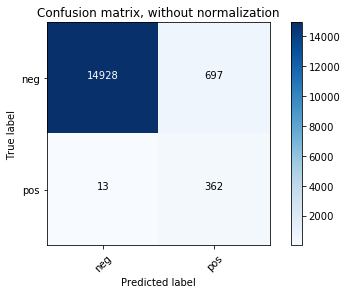

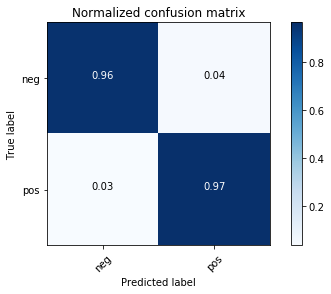

Score: 13470


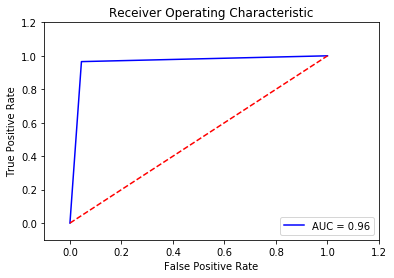

"\n#Hisotgram mean as feature\nclassifier = DecisionTreeClassifier()#class_weight={'pos':.983, 'neg':.017},max_depth =max_depth, min_samples_leaf =min_samples_leaf)  \nclassifier.fit(pd.DataFrame(data=meanTrainSetHist,columns=HISTOGRAMMERGEDCOLUMNS), pd.DataFrame(data=meanTrainSetHist,columns=['class']))  \npredictions = classifier.predict(pd.DataFrame(data=meanTestSetHist,columns=HISTOGRAMMERGEDCOLUMNS))  \nscore = evaluate(pd.DataFrame(data=meanTestSetHist,columns=['class']), predictions)\n\n\nclassifier = DecisionTreeClassifier()#class_weight={'pos':.983, 'neg':.017},max_depth =max_depth, min_samples_leaf =min_samples_leaf)  \nclassifier.fit(pd.DataFrame(data=medianTrainSetHist,columns=HISTOGRAMMERGEDCOLUMNS), pd.DataFrame(data=medianTrainSetHist,columns=['class']))  \npredictions = classifier.predict(pd.DataFrame(data=medianTestSetHist,columns=HISTOGRAMMERGEDCOLUMNS))  \nscore = evaluate(pd.DataFrame(data=medianTestSetHist,columns=['class']), predictions)\n\nclassifier = DecisionTr

In [39]:
#Implementation of Decision Tree

max_depth = 100
min_samples_leaf = 10

#Use max_depth, and min_sample leafs to prevent overfitting according to http://scikit-learn.org/stable/modules/tree.html#tree 1.10.5

'''
#histogram bin as feature
classifier = DecisionTreeClassifier()#class_weight={'pos':.983, 'neg':.017},max_depth =max_depth, min_samples_leaf =min_samples_leaf)  
classifier.fit(pd.DataFrame(data=meanTrainSet,columns=COLUMNS), pd.DataFrame(data=meanTrainSet,columns=['class']))  
predictions = classifier.predict(pd.DataFrame(data=meanTestSet,columns=COLUMNS))  
score = evaluate(pd.DataFrame(data=meanTestSet,columns=['class']), predictions)
'''

classifier = DecisionTreeClassifier(class_weight={'pos':.983, 'neg':.017},max_depth =3)  
classifier.fit(pd.DataFrame(data=mostFrequentTrainSet,columns=COLUMNS), pd.DataFrame(data=mostFrequentTrainSet,columns=['class']))  
predictions = classifier.predict(pd.DataFrame(data=mostFrequentTestSet,columns=COLUMNS))  
score = evaluate(pd.DataFrame(data=mostFrequentTestSet,columns=['class']), predictions)

plot_roc(predictions)

'''
#Hisotgram mean as feature
classifier = DecisionTreeClassifier()#class_weight={'pos':.983, 'neg':.017},max_depth =max_depth, min_samples_leaf =min_samples_leaf)  
classifier.fit(pd.DataFrame(data=meanTrainSetHist,columns=HISTOGRAMMERGEDCOLUMNS), pd.DataFrame(data=meanTrainSetHist,columns=['class']))  
predictions = classifier.predict(pd.DataFrame(data=meanTestSetHist,columns=HISTOGRAMMERGEDCOLUMNS))  
score = evaluate(pd.DataFrame(data=meanTestSetHist,columns=['class']), predictions)


classifier = DecisionTreeClassifier()#class_weight={'pos':.983, 'neg':.017},max_depth =max_depth, min_samples_leaf =min_samples_leaf)  
classifier.fit(pd.DataFrame(data=medianTrainSetHist,columns=HISTOGRAMMERGEDCOLUMNS), pd.DataFrame(data=medianTrainSetHist,columns=['class']))  
predictions = classifier.predict(pd.DataFrame(data=medianTestSetHist,columns=HISTOGRAMMERGEDCOLUMNS))  
score = evaluate(pd.DataFrame(data=medianTestSetHist,columns=['class']), predictions)

classifier = DecisionTreeClassifier(class_weight={'pos':.983, 'neg':.017},max_depth =max_depth, min_samples_leaf =min_samples_leaf)  
classifier.fit(pd.DataFrame(data=mostFrequentTrainSetHist,columns=HISTOGRAMMERGEDCOLUMNS), pd.DataFrame(data=mostFrequentTrainSetHist,columns=['class']))  
predictions = classifier.predict(pd.DataFrame(data=mostFrequentTestSetHist,columns=HISTOGRAMMERGEDCOLUMNS))  
score = evaluate(pd.DataFrame(data=mostFrequentTestSetHist,columns=['class']), predictions)
'''




In [11]:
#Printing of the decision tree
dot_data = tree.export_graphviz(classifier, out_file=None, class_names=CLASS_LABELS, feature_names=COLUMNS, 
                         filled=True, rounded=True,) 
graph = graphviz.Source(dot_data) 
graph.render("DT")

'DT.pdf'

             precision    recall  f1-score   support

        neg       0.99      0.99      0.99     15625
        pos       0.73      0.63      0.68       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15536    89]
 [  138   237]]
Normalized confusion matrix
[[0.994304 0.005696]
 [0.368    0.632   ]]


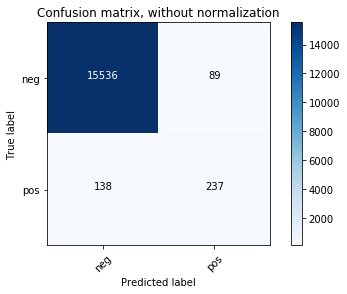

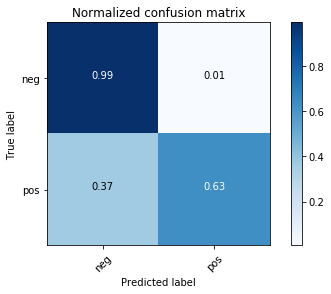

Score: 69890


In [14]:
#Implementation of Support vector Machines(Linear)
linearSvm = svm.LinearSVC(class_weight={'pos':.983, 'neg':.017})

target = pd.DataFrame(data=mostFrequentTrainSet,columns=['class'])

linearSvm.fit(pd.DataFrame(data=mostFrequentTrainSet,columns=COLUMNS),target.values.ravel())  
predictions = linearSvm.predict(pd.DataFrame(data=mostFrequentTestSet,columns=COLUMNS))  
score = evaluate(pd.DataFrame(data=mostFrequentTestSet,columns=['class']), predictions)

